# Homework 07 - Cross Validation (55 pts)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Import diabetes dataset

In [66]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
y -= y.mean()
y /= y.std()
features = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetesdf = pd.DataFrame(diabetes.data, columns=features)
diabetesdf.tail()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


### 1. (5 pts) Split the diabetes features ($X$) and target ($y$) data into training and testing sets, with 25% of the data in the test set. Don't just choose the last block of patients for the test set, but randomly shuffle the patients before partitioning them into training and test sets.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=1)

### 2. (10 pts) Fit an ordinary least squares (OLS) model to the training data. Also fit a RidgeCV and LassoCV model using 5-fold cross validation to the same training data. We didn't use the Lasso model in class, but it's straightforward. Report the value of the best hyperparameter $\alpha$ for the Ridge and Lasso models.

In [87]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

ols = LinearRegression().fit(X_train, y_train)
ridge = RidgeCV(alphas=np.logspace(-9, 0, 100), cv=5).fit(X_train, y_train)
lasso = LassoCV(alphas=np.logspace(-9, 0, 100), cv=5).fit(X_train, y_train)

ridge.alpha_, lasso.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.08111308307896872, 0.0008111308307896872)

### 3. (5 pts) Plot the weights (slopes) of each feature for all three of the above models in a single bar graph for easy comparison.

In [88]:
wdf = pd.DataFrame(np.c_[ols.coef_, ridge.coef_, lasso.coef_], columns=['OLS', 'Ridge', 'Lasso'], index=features)

wdf

,OLS,Ridge,Lasso
age,-0.102064,0.056243,-0.000000
sex,-3.182263,-2.737992,-2.449700
bmi,7.468490,6.932567,7.478752
map,4.205579,3.858501,3.696369
tc,-6.749814,-0.793093,-0.906621
ldl,3.254450,-1.101718,-0.000000
hdl,0.012514,-2.504845,-3.018453
tch,2.344097,1.668754,0.000000
ltg,7.983295,5.275437,6.071741
glu,0.676653,0.986121,0.456931


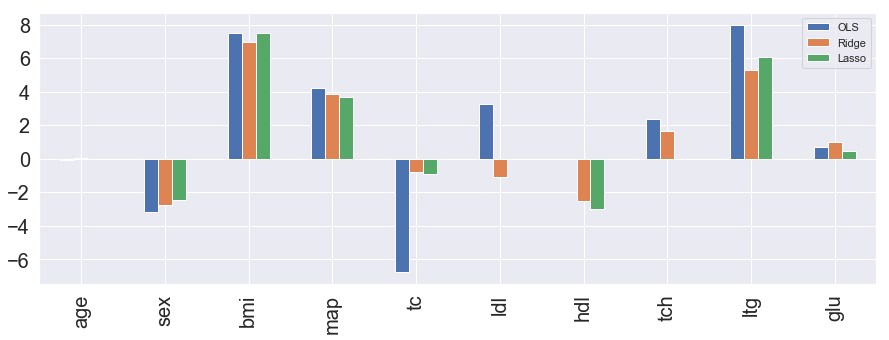

In [89]:
wdf.plot.bar(figsize=(15, 5), fontsize=20);

### 4. (5 pts) Report the mean squared error (MSE) for each model using the test set.

In [90]:
mse = pd.DataFrame(index=['test MSE'])
mse['OLS'] = [np.mean((y_test - ols.predict(X_test))**2)]
mse['Ridge'] = [np.mean((y_test - ridge.predict(X_test))**2)]
mse['Lasso'] = [np.mean((y_test - lasso.predict(X_test))**2)]

mse

,OLS,Ridge,Lasso
test MSE,0.489571,0.494804,0.497751


### 5. (5 pts) Examine the plot in #3 above of the weights for each model. What did the Ridge model provide as compared to the OLS model?

* Reduced large coefficients, especially tc and ldl which are correlated and thus not well contrained in the linear model.

### 6. (5 pts) Examine the plot in #3 above of the weights for each model. What did the Lasso model do to the coefficients in comparison to the Ridge model? Why might that be beneficial? If you're not sure, you might want to print out the numeric weights.

* Set some of the coefficients to zero, notably those with small weights or that are highly correlated with another feature.
* Tells us that we can ignore some of the features that do not have much impact on our predictions for diabetes.

### 7. (5 pts) What is the point of splitting up a dataset into training and testing sets?

* Testing your fit error on data the model was not trained on prevents overfitting noise in the data.

### 8. (5 pts) What is the point of cross validation?

* Averaging over various train/test splits mitigates errors due to lumping outliers in either the training or testing data.

### 9. (10 pts) Use 5-fold cross validation to fit a K Nearest Neighbors regression model to the diabetes training set. Report the best choice for K and the MSE for the test set.

In [92]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 101)}
knn = neighbors.KNeighborsRegressor()
grid = GridSearchCV(knn, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
K = grid.best_params_['n_neighbors']
knn = neighbors.KNeighborsRegressor(n_neighbors=K)
knn.fit(X_train, y_train)
MSE = np.mean((y_test - knn.predict(X_test))**2)

print(f'K = {K}')
print(f'MSE = {MSE}')

K = 20
MSE = 0.5372517078616804


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
